In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
x = [1, 2, 3, -1, 2]
y = [2, 2, 1, 0, -1]

## 1. Unsupervised learning: basics

### 1.1. Theory
#### Everyday example: Google news
While browsing through `Google News`, have you wondered what goes behind grouping news items together? How does the algorithm decide which articles are similar? It is the result of an **unsupervised learning algorithm**.

It **scans /match** through the `text` of each article and based on *frequently occurring terms, groups articles together*. The group of articles shown here is based on the Indian cricket team. 

Through this course, you will be introduced to various clustering techniques. Similar to this example, you will also perform document clustering on text.

#### Labeled and unlabeled data
Before we define unsupervised learning, let us try to understand the terms: `labeled` and `unlabeled` data. 

Imagine you have a list of points with `X` and `Y` coordinates.

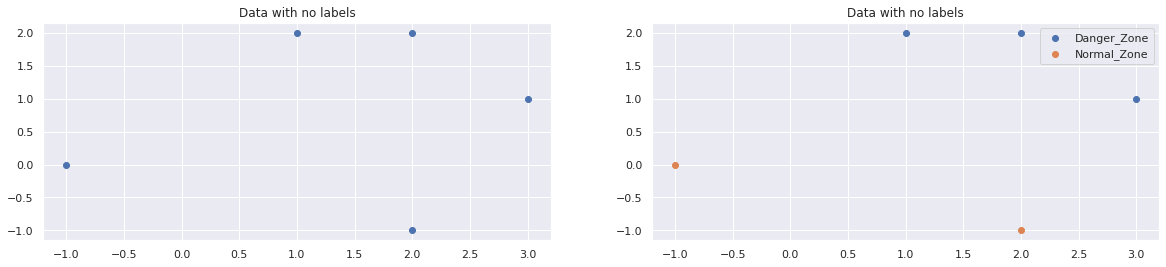

In [2]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))
ax[0].scatter(x, y)
ax[0].set_title('Data with no labels')

ax[1].scatter(x[:3], y[:3], label = 'Danger_Zone')
ax[1].scatter(x[3:], y[3:], label = 'Normal_Zone')
ax[1].set_title('Data with no labels')
plt.legend()
plt.show()

If only the coordinates of the points are available and there is no other characteristic available to distinguish the data points, it is called unlabeled data. At the same time, if we associate each data point with a group beforehand, say normal and danger zones, we call it labeled data.

#### What is unsupervised learning?
- It is an **umbrella term for a group of machine learning algorithms** that are used to **find patterns** in data. 
- The `data` that is used in these algorithms is **not labeled**, classified or characterized prior to running the algorithm. 
- The `algorithm` is run, therefore, to find and **explain inherent structures within the data**. 
- Common unsupervised learning algorithms are `clustering`, `anomaly detections`, and `neural networks`. 

Clustering is used to group similar data points together.

#### What is clustering?
Let us now move on to a specific class of unsupervised learning algorithms. 
- Clustering is the process of grouping items with similar characteristics. 
- The groups so formed are such that items in a single group are closer to each other in terms of some characteristics as compared to items in other clusters. 

Clustering falls under the group of unsupervised learning algorithms as the data is `not labeled`, grouped or characterized beforehand. 

A `simple example` to demonstrate clustering would be to group points on a `2D plane` based on their distance.

#### Plotting data for clustering - Pokemon sightings
To make a scatter plot, we will use the pyplot class of the matplotlib library in Python. We will plot the sightings of Pokemon in a park in the form of coordinates. 
- The first step, therefore, is to import the required class as `plt`. 
- Next, we define the coordinates of points to be plotted in two lists - one each for `x` and `y` coordinates. In this case, we have fifteen sightings that we would like to plot. 
- Finally, we use the scatter method of the pyplot class, with the lists for the coordinates as arguments and the plot method to display the plot. 

### 1.2. PRACTICES
#### Exercise 1.2.1. Unsupervised learning in real world
Which of the following examples can be solved with unsupervised learning?
>- A. A **list of tweets** to be classified based on their **sentiment**, the data has tweets associated with a **positive or negative sentiment**.
>- B. A **spam recognition system** that marks incoming emails as spam, the data has emails marked as spam and not spam.
>- C. Segmentation of learners at DataCamp based on courses they complete. The **training data has no labels**.

#### Answers.
Noting that your data has no labels, hence **C** is the correct answer.

#### Exercise 1.2.2. Pokémon sightings
There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be. 

In [3]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

The `X` and `Y` coordinates of the points are stored in list x and y, respectively.
#### SOLUTION

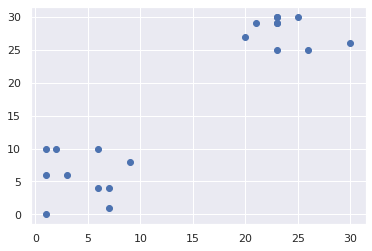

In [4]:
# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

## 2. Basics of cluster analysis
### 2.1. Theory
#### What is a cluster?
First, let us define a cluster. It is a `group of items with similar characteristics`. 

> In the Google News example, a cluster of news articles has similar words and word associations appearing in them. 
> Another example of clustering is [segmentation of customers](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/tree/master/Statistics/Machine%20Learning/Clustering%20%26%20Segmentation/Customer%20Segmentation) based on their spending `habits`. A `cluster of customers` would exhibit similar `spending habits`.

#### Clustering algorithms
Although there are other algorithms like the density based [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) technique or Gaussian models for cluster analysis, this course will focus only on the two most common techniques - [hierarchical](https://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html?highlight=hierarchical) and [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans) clustering.

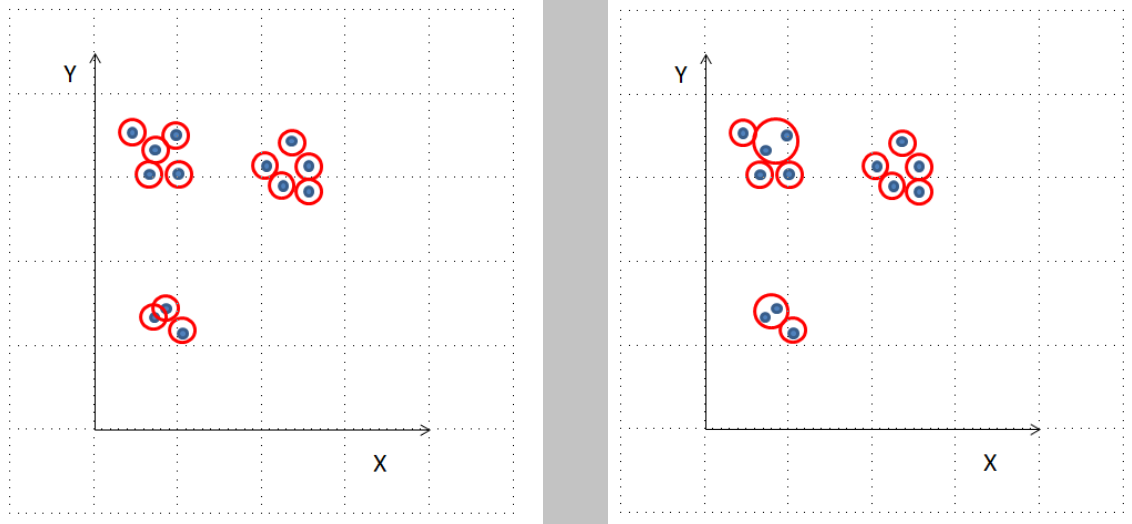

In [5]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

#### Hierarchical clustering algorithm
For demonstration purposes, let us consider 13 points on a 2D plane.
- **Step 1.** 

>> In the first step, all the points are considered as individual clusters.

>> A `cluster center` is a `mean` of attributes of `all data points` in a cluster. In this case, cluster centers will have two attributes - the mean of x and y coordinates. At this stage, cluster centers of all clusters are the coordinates of the individual points.

- **Step 2.** 

>> Next, the distances between all pairs of cluster centers are computed and the two closest clusters are merged. The cluster center of the merged cluster is then recomputed. 

>> In the example, two clusters on the bottom left have been merged. At this step, we are left with 12 clusters, one less than we started.

- **Step 3.**

>> In the second step, the clusters with the closest cluster centers are merged on the top left. This process of merging the two closest clusters continues until we arrive at the desired clusters. 

>> At every step, the number of clusters reduces by one. As visible from the distribution of points, let us stop at three clusters.

- **Step 4.**
Finally, these are three clusters that you arrive at after the algorithm has run.

#### Hierarchical clustering in SciPy
The required methods for hierarchical clustering, linkage and fcluster, are stored in scipy-dot-cluster-dot-hierarchy. We will explore the parameters of these methods later in the course. We additionally import pyplot and seaborn for visualization and pandas for data manipulation. A list of fifteen points with x and y coordinates is stored in a dataframe. 


In [6]:
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns, pandas as pd

X = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
    10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
Y = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
    47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

- First, the `linkage method` computes distances between intermediate clusters.

In [7]:
df = pd.DataFrame({'x_coordinate': X,
                  'y_coordinate': Y})
Z = linkage(df, 'ward'); Z

array([[  5.        ,   8.        ,   1.6643317 ,   2.        ],
       [  2.        ,   4.        ,   3.20624391,   2.        ],
       [ 12.        ,  14.        ,   5.23450093,   2.        ],
       [  1.        ,   3.        ,   6.54599114,   2.        ],
       [  6.        ,   9.        ,   7.95110055,   2.        ],
       [  0.        ,  16.        ,  10.7827022 ,   3.        ],
       [ 15.        ,  19.        ,  13.87389635,   4.        ],
       [ 11.        ,  17.        ,  15.33144916,   3.        ],
       [  7.        ,  21.        ,  16.74362565,   5.        ],
       [ 18.        ,  20.        ,  18.13646419,   5.        ],
       [ 10.        ,  13.        ,  18.3613725 ,   2.        ],
       [ 22.        ,  25.        ,  26.96943949,   5.        ],
       [ 23.        ,  26.        , 124.5635661 ,  10.        ],
       [ 24.        ,  27.        , 211.66866718,  15.        ]])

- Next, the `fcluster method` generates clusters and assigns associated cluster labels to a new column in the dataframe. 

In [8]:
df['cluster_labels'] = fcluster(Z, 3, criterion = 'maxclust')
df['cluster_labels']

0     1
1     1
2     1
3     1
4     1
5     2
6     2
7     2
8     2
9     2
10    3
11    3
12    3
13    3
14    3
Name: cluster_labels, dtype: int32

- Finally, we plot the points using seaborn with the cluster labels as the hue argument to associate clusters with different colors.

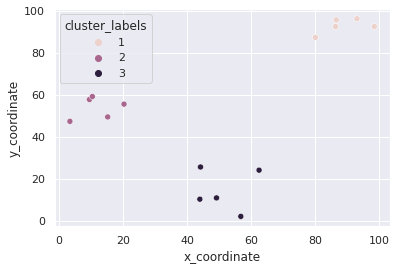

In [9]:
sns.scatterplot(x = 'x_coordinate',
                y = 'y_coordinate',
                hue = 'cluster_labels',
               data = df
               )
plt.show()

#### Hierarchical clustering results
Here is the result of the seaborn scatterplot, showing the three clusters.

- **`K-means clustering algorithm: Part 1`.**

>> Next, we discuss the algorithm of `k-means clustering` with the same set of points to create **three clusters**.

- **Part 2.**

>> First, a **random cluster center is generated** for each of the three clusters.

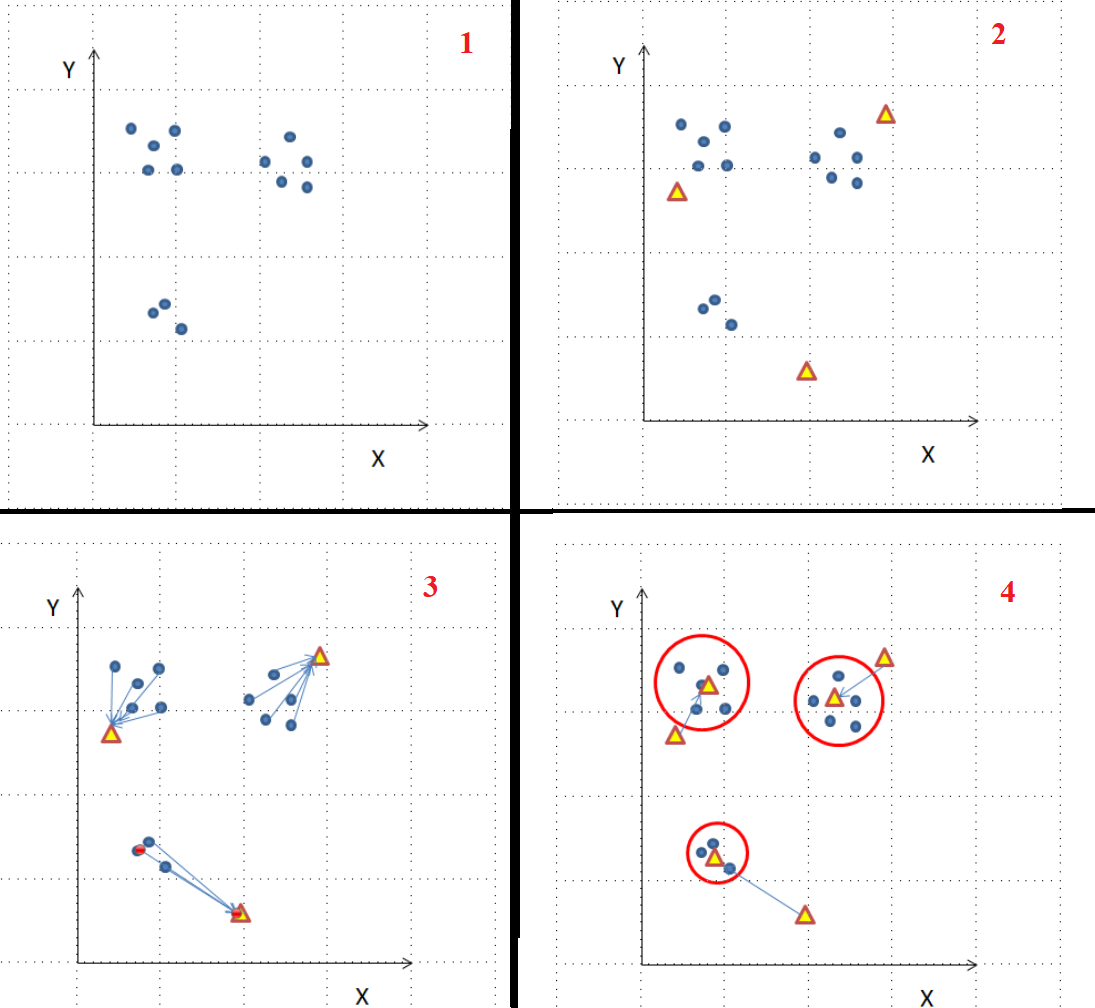

In [10]:
## Hình minh họa Image(fig1, height, width)

- **Part 3.**

>> Next, the **distance** to these **cluster centers** is computed for each point to assign to the **closest cluster**.

- **Part 4.**

>> The `cluster centers` are **recomputed**. 

>> This **iteration** of assigning points to the `recomputed cluster centers` is performed a predefined number of times. Here, the clusters have been formed in the first iteration.

#### K-means clustering in SciPy
`K-means clustering` is implemented using `methods kmeans` and `vq` of `scipy.cluster.vq`. 

In [11]:
from scipy.cluster.vq import kmeans, vq
df = pd.DataFrame({'x_coordinate': X,
                  'y_coordinate': Y})

- The centroids of the clusters are computed using kmeans and cluster assignments for each point are done through `vq`. 
- The second argument in both methods is distortion, which we capture in a dummy variable. We will explore the parameters of these methods later in the course. 

In [12]:
centroids, _ = kmeans(df, 3)
df['cluster_labels'], _ = vq(df, centroids)

- Finally, we plot the clusters using seaborn.

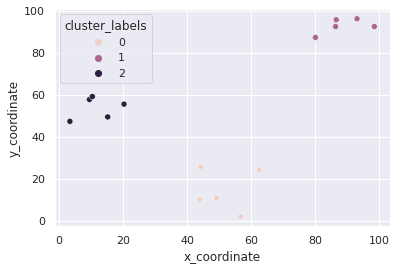

In [13]:
sns.scatterplot(x = 'x_coordinate',
                y = 'y_coordinate',
                hue = 'cluster_labels',
               data = df
               )
plt.show()

### 2.2. PRACTICES
#### Exercise 2.2.1. Pokémon sightings: hierarchical clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.

In [14]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]
df = pd.DataFrame({'x': x, 'y': y})

'x' and 'y' are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.
#### SOLUTION.

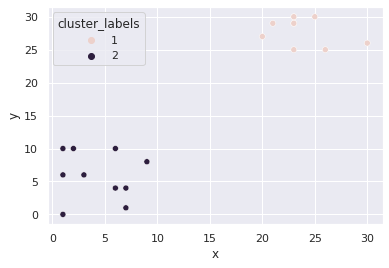

In [15]:
# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate 2 cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

#### Exercise 2.2.2. Pokémon sightings: k-means clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

x and y are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.
#### SOLUTION.

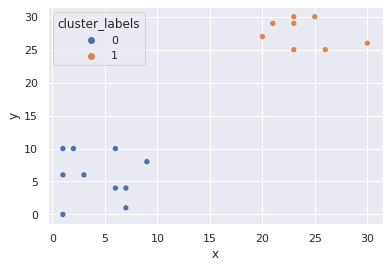

In [16]:
import numpy as np

# convert x,y to float
df = pd.DataFrame({'x': np.array(x, dtype = 'float'), 
                   'y': np.array(y, dtype = 'float')})

# Compute cluster centers
centroids, _ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

## 3. Data preparation for cluster analysis
### 3.1. Theory.
#### Why do we need to prepare data for clustering?
Why do we need to prepare data for clustering? 
- Imagine a situation where you have a set of variables with **incomparable units** - such as the dimensions of a product and its price. 
- Even if variables have the same unit, they may be significantly **different in** terms of their **scales and variances**. For instance, the amount that one may spend on an inexpensive item like cereals is low as compared to traveling expenses. 
- If we use data in this raw form, the `results of` **clustering may be biased**. 
- The `clusters` formed may be **dependent on one variable** significantly more than the other. 

How do we account for these issues, then? We use a process called **normalization**.

#### Normalization of data
What is normalization of data? 

- It is a process by which we rescale the values of a variable with respect to standard deviation of the data. The resultant standard deviation post normalization is 1. 
- The process of normalization is simple and achieved through dividing a value by its standard deviation.

Let us look at its implementation in Python. 
- A normalization library is available on the SciPy package, using the whiten method of the vq class. 

In [17]:
from scipy.cluster.vq import whiten

First, we initiate the data to be normalized in a list and then use the whiten method, to transform. 

The `array` may be one or multi dimensional. 

Note that, in the example, we use a one dimensional list. 

In [18]:
data_1d = np.array([2, 5, 4, 6, 7, 3, 1])

print('Scaled with using scipy.cluster.vq: \n' , whiten(data_1d))
print('Using division with std :\n', data_1d / data_1d.std())

Scaled with using scipy.cluster.vq: 
 [1.  2.5 2.  3.  3.5 1.5 0.5]
Using division with std :
 [1.  2.5 2.  3.  3.5 1.5 0.5]


In case of a multi dimensional array or list of lists, whiten divides each value by the standard deviation of the column. The result of the whiten method is an array of the same dimensions.

In [19]:
data_2d = np.array([x, y])
scaled_data_2d = whiten(data_2d)

#### Illustration: normalization of data
Let us look at a plot using the matplotlib library in Python to compare the results of the normalization process. 
- First, you need import the pyplot class of the matplotlib library in Python. We initialized the two lists which contain the original and scaled data points. By default, pyplot plots line graphs. 
- Next, we enable the legend in the graph and then display the plot. Let us see how the plot looks like. The original and scaled lists have been plotted in blue and orange colors, respectively. The serial number of the points is in the x axis, whereas the value of the original and scaled data points is in the y axis.

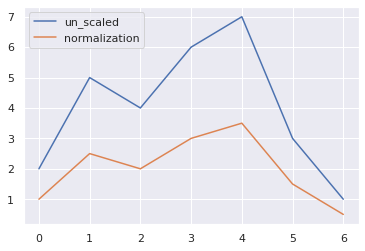

In [20]:
plt.plot(data_1d, label = 'un_scaled')
plt.plot(whiten(data_1d), label = 'normalization')
plt.legend()
plt.show()

As you can see, the variation in the scaled data has been toned down from the original data. Interestingly, the trends remain similar to the original data though.

### 3.2. PRACTICES
#### Exercise 3.2.1. Normalize basic list data
Now that you are aware of normalization, let us try to normalize some data. goals_for is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the whiten() function.
#### SOLUTION.

In [21]:
goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


#### Exercise 3.2.2. Visualize normalized data
After normalizing your data, you can compare the scaled data to the original data to see the difference. 

The variables from the last exercise, `goals_for` and `scaled_data` are already available to you (from the previous exercise).
#### SOLUTION

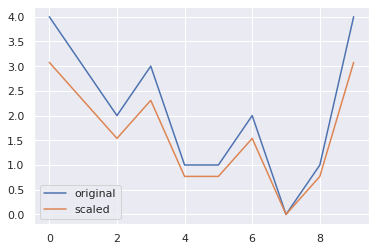

In [22]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend(loc = 'best')

# Display the plot
plt.show()

#### Exercise 3.2.3. Issuse of normalization for the small numbers
In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. For your use, matplotlib.pyplot is imported as plt.
#### SOLUTION.

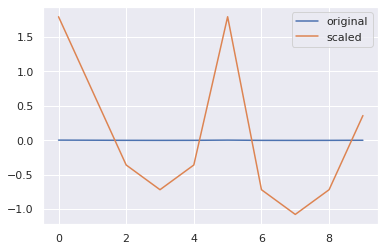

In [23]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

**Comments**. Notice how the changes in the original data are negligible as compared to the scaled data.

#### Exercise 3.2.4. FIFA 18: Normalize data
FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

In [24]:
fifa = pd.read_csv(r"../input/cluster-dataset/fifa_18_sample_data.csv")
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


The data for this exercise is stored in a Pandas dataframe, fifa. whiten from scipy.cluster.vq and matplotlib.pyplot as plt have been pre-loaded.
#### SOLUTION.

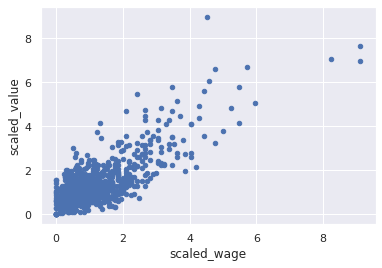

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [25]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())